In [11]:
!pip install pillow
!pip install keras
!pip install sagemaker-tensorflow
!pip install cmake tensorflow

     |████████████████████████████████| 16.5MB 29.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
Processing /home/ec2-user/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd/wrapt-1.11.2-cp36-cp36m-linux_x86_64.whl
Processing /home/ec2-user/.cache/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833/opt_einsum-3.1.0-cp36-none-a

In [3]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 19.7MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [3]:
# Directory path
train_data_dir = 'data/Cracks/train'
test_data_dir = 'data/Cracks/test'

# Get all the data in the directory data/validation, and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=463, color_mode='grayscale')

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=1854, color_mode='grayscale')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 463 images belonging to 2 classes.
Found 1854 images belonging to 2 classes.


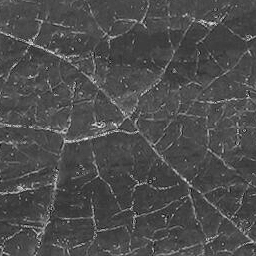

In [4]:
# Previewing an image
array_to_img(train_images[15])

In [9]:
# Checking shape of data
print('train data shape:', np.shape(train_images), np.shape(train_labels))
print('test data shape:', np.shape(test_images), np.shape(test_labels))

('train data shape:', (1854, 256, 256, 1), (1854, 2))
('test data shape:', (463, 256, 256, 1), (463, 2))


In [11]:
# Unrowing/transposing
train_img_unrow = train_images.reshape(1854, -1).T
print('train unrow:', np.shape(train_img_unrow))

test_img_unrow = test_images.reshape(463, -1).T
print('test unrow:', np.shape(test_img_unrow))

('train unrow:', (65536, 1854))
('test unrow:', (65536, 463))


In [12]:
# Looking at the labels
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [13]:
train_generator.class_indices

{'Dutch': 0, 'Flemish': 1}

In [20]:
# Transposing the labels
train_labels_final = train_labels.T[[1]]
print('train labels final:', np.shape(train_labels_final))

test_labels_final = test_labels.T[[1]]
print('test labels final:', np.shape(test_labels_final))

('train labels final:', (1, 1854))
('test labels final:', (1, 463))
